## Uber Analysis - MIT

Key Questions

- What are the different variables that influence pickups?

- Which factor affects the pickups the most? What could be plausible reasons for that?

- What are your recommendations to Uber management to capitalize on fluctuating demand?

Guidelines

- Perform univariate analysis on the data to better understand the variables at your disposal.

- Perform bivariate analysis to better understand the relationships between different variables.

- Create visualizations to explore data and extract the insights.

#### Loading the data

In [2]:
import pandas as pd

data = pd.read_csv('/Users/felipe_q/Desktop/AI_models/MACHINE_LEARNING/mlenv/MachineLearning_Fundamentals/data/Uber.csv')
data.head(10)

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
5,2015-01-01 01:00:00,Staten Island,6,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
6,2015-01-01 01:00:00,NaN,4,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
7,2015-01-01 02:00:00,Bronx,120,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,Y
8,2015-01-01 02:00:00,Brooklyn,1229,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,Y
9,2015-01-01 02:00:00,EWR,0,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,Y


## Univariate analysis

Data Dictionary

The data contains information about the weather, location, and pickups.

pickup_dt: Date and time of the pick-up

borough: NYC's borough

pickups: Number of pickups for the period

spd: Wind speed in miles/hour

vsb: Visibility in miles to the nearest tenth

temp: Temperature in Fahrenheit

dewp: Dew point in Fahrenheit

slp: Sea level pressure

pcp01: 1-hour liquid precipitation

pcp06: 6-hour liquid precipitation

pcp24: 24-hour liquid precipitation

sd: Snow depth in inches

hday: Being a holiday (Y) or not (N)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29101 non-null  int64  
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       29101 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB


In [4]:
data.describe()

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd
count,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000
mean,490.215903,5.984924,8.818125,47.669042,30.823065,1017.817938,0.003830,0.026129,0.090464,2.529169
std,995.649536,3.699007,2.442897,19.814969,21.283444,7.768796,0.018933,0.093125,0.219402,4.520325
min,0.000000,0.000000,0.000000,2.000000,-16.000000,991.400000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,9.100000,32.000000,14.000000,1012.500000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,6.000000,10.000000,46.000000,30.000000,1018.200000,0.000000,0.000000,0.000000,0.000000
75%,449.000000,8.000000,10.000000,64.500000,50.000000,1022.900000,0.000000,0.000000,0.050000,2.958333
max,7883.000000,21.000000,10.000000,89.000000,73.000000,1043.400000,0.280000,1.240000,2.100000,19.000000


In [5]:
data_obj = data.select_dtypes(exclude=['number'])
data_obj[['borough', 'hday']].value_counts()

borough        hday
Bronx          N       4176
Brooklyn       N       4176
EWR            N       4176
Manhattan      N       4176
Queens         N       4176
Staten Island  N       4176
Bronx          Y        167
Brooklyn       Y        167
EWR            Y        167
Manhattan      Y        167
Queens         Y        167
Staten Island  Y        167
Name: count, dtype: int64

In [30]:
### Converting the data to only select the hours
data['pickup_dt'] = pd.to_datetime(data['pickup_dt'])
data['hour'] = data['pickup_dt'].dt.hour

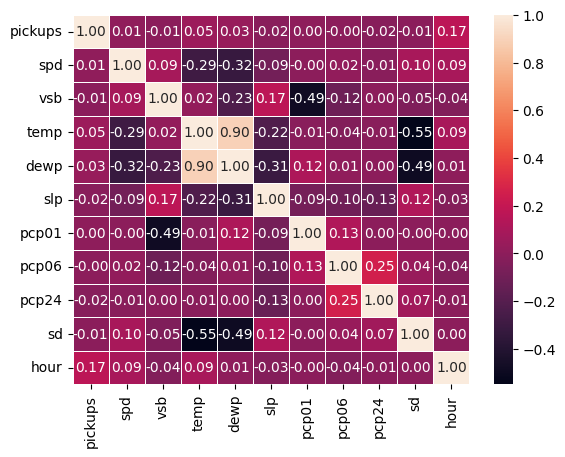

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr(numeric_only=True)

plt.figure()
sns.heatmap(corr_matrix, annot = True, linewidths= 0.5, fmt = ".2f")
plt.show()

At a first glance, we see that there is not a strong correlation between the pickup time and the other numerical variables. We convert the datetimes to see if there is a correlation between the time of the day and the pickup

In [32]:
data.head(5)

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,hour
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,1
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,1
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,1
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,1
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,1
